# Data Understanding


We will build a non linear model(using non-linear kernels)and then find the optimal hyperparameters(using kernel,C,gamma)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [3]:
letters=pd.read_csv("letter-recognition.csv")

In [6]:
# About the dataset
print("Dimensions: {}".format(letters.shape))

print("Data_info: {}".format(letters.info()))


Dimensions: (20000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
xbox      20000 non-null int64
ybox      20000 non-null int64
width     20000 non-null int64
height    20000 non-null int64
onpix     20000 non-null int64
xbar      20000 non-null int64
ybar      20000 non-null int64
x2bar     20000 non-null int64
y2bar     20000 non-null int64
xybar     20000 non-null int64
x2ybar    20000 non-null int64
xy2bar    20000 non-null int64
xedge     20000 non-null int64
xedgey    20000 non-null int64
yedge     20000 non-null int64
yedgex    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
Data_info: None


In [8]:
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
letters.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [12]:
# Removing the Spaceing in the columns names. 
letters.columns=['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']

letters.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [21]:
# Uniquely Sort the Array
order_list=list(np.sort(letters.letter.unique()))
print(order_list)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


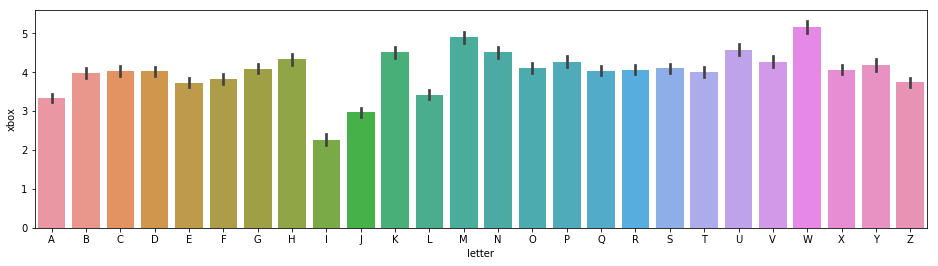

In [26]:
# Plots : how do various attribute vary with the letters
plt.figure(figsize=(16,4))
sns.barplot(x="letter",y="xbox",data=letters,order=order_list)

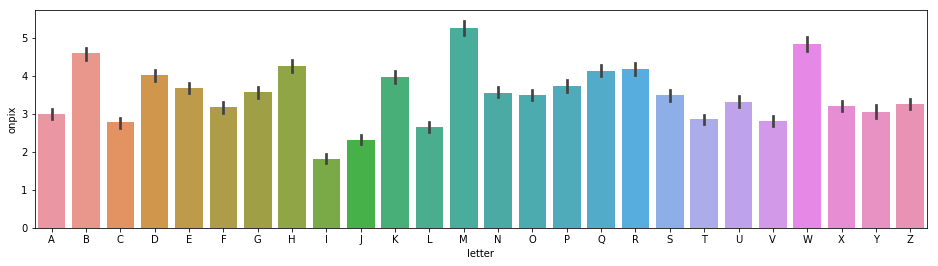

In [25]:
plt.figure(figsize=(16,4))
sns.barplot(x="letter",y="onpix",data=letters,order=order_list)

In [33]:
letter_mean=letters.groupby("letter").mean()
letter_mean.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


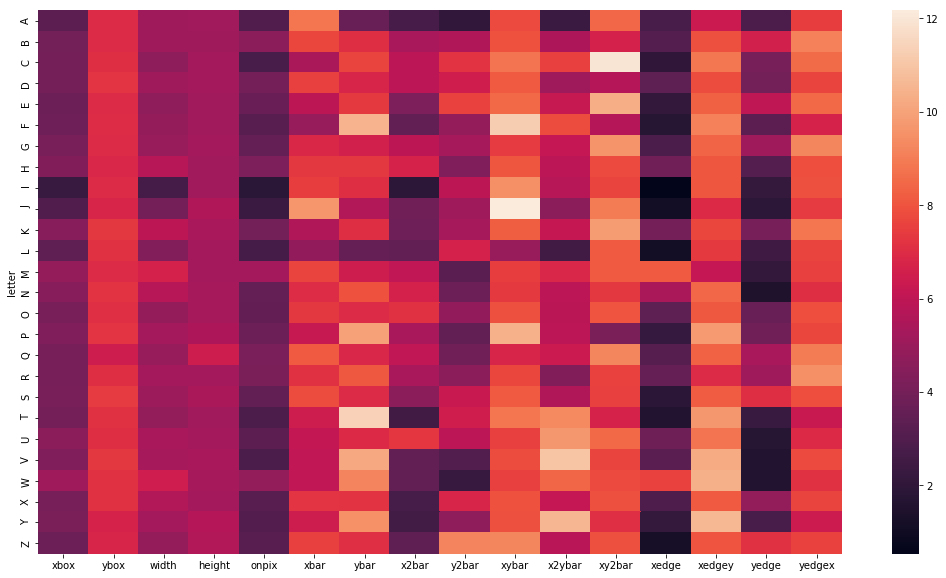

In [34]:
plt.figure(figsize=(18,10))
sns.heatmap(letter_mean)

In [35]:
# Features having varying range so just rescale them.


# Data Preparation

Some Data Preparation steps before modelling.Firstly it is important to rescale the features,since they have varying ranges. 
For here we have average values

In [40]:
round(letters.drop('letter',axis=1).mean(),2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

In [41]:
X=letters.drop("letter",axis=1)
y=letters.letter

In [42]:
# scaling the features
X_scaled=scale(X)

# train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=4)

# Model Building

In [43]:
# we build 2 models - linear and non linear with default parameters and compare the values

In [44]:
model_linear=SVC(kernel="linear")
model_linear.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
y_pred=model_linear.predict(X_test)

In [51]:

print(metrics.confusion_matrix(y_true=y_test,y_pred=y_pred))

[[229   0   0   0   0   0   2   0   0   1   3   0   2   0   1   0   1   3
    0   0   1   0   0   0   0   0]
 [  0 175   0   3   2   0   3   4   1   1   1   0   0   1   0   0   0   7
    4   0   0   0   0   1   0   0]
 [  0   0 191   0   6   1   6   2   0   0   7   0   0   0   1   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   8   0 206   0   1   0   4   0   0   0   0   1   1   0   1   0   1
    0   0   5   0   0   0   0   0]
 [  0   2   5   0 186   2  13   0   0   0   0   3   0   0   0   0   2   2
   10   2   0   0   0   0   0   1]
 [  0   0   0   1   2 182   2   1   0   0   1   0   0   4   0   5   0   0
    2   3   0   0   0   0   1   0]
 [  0   2  15   3   3   1 180   1   0   0   3   1   1   0   1   1   9   4
    4   0   1   1   2   1   0   0]
 [  2   5   2  10   0   4   0 126   0   4  10   0   0   0  10   0   6  15
    0   0   2   1   0   3   2   0]
 [  0   1   0   2   1   6   0   0 203   9   0   2   0   0   1   0   0   0
    5   0   0   0   0   3   0   1]
 [  9   0   0   3  

In [50]:
print("accuracy:{}".format(metrics.accuracy_score(y_pred=y_pred,y_true=y_test)))


accuracy:0.8528333333333333


***Linear MOdel*** gives a approx 85.28 % accuracy.

NOw Check out ***nonLinear model***  

In [52]:
# Non linear model using rbf with C=1 nd  default value of gamma

# model
non_linear_model=SVC(kernel="rbf")

#fit
non_linear_model.fit(X_train,y_train)

#Predict
y_pred=non_linear_model.predict(X_test)

In [53]:
print(metrics.confusion_matrix(y_pred=y_pred,y_true=y_test))

[[238   0   1   1   0   0   0   0   0   0   1   0   1   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 193   0   4   1   0   0   1   0   0   0   0   0   0   0   0   0   1
    1   1   0   0   0   1   0   0]
 [  0   0 200   0   4   0   6   1   0   0   1   0   0   0   2   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   3   0 216   0   0   0   7   0   0   0   0   0   1   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   1   1   0 211   1   9   0   0   0   0   0   0   0   0   0   3   1
    0   0   0   0   0   0   0   1]
 [  0   1   0   0   1 197   0   0   0   0   0   0   0   1   1   0   0   0
    0   3   0   0   0   0   0   0]
 [  0   0   0   1   0   0 224   1   0   0   0   0   0   0   4   0   2   2
    0   0   0   0   0   0   0   0]
 [  0   4   1   8   0   0   1 163   0   0   1   0   0   0   4   0   5   9
    0   0   3   0   0   2   1   0]
 [  0   1   0   0   0   3   0   0 216   9   0   0   0   0   0   0   0   0
    4   0   0   0   0   1   0   0]
 [  0   0   0   3  

In [54]:
print("Accuracy :{}".format(metrics.accuracy_score(y_pred,y_test)))

Accuracy :0.9431666666666667


Hence Non_linear model gives approx 93% accuracy.thus,going forward ,choose the hyperparameters corresponding to non_linear model

# Grid Search :Hyperparameter Tuning

Tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We will use 5 kfolds

In [59]:
folds=KFold(n_splits=5,shuffle=True,random_state=4)

hyper_params=[{"gamma":[1e-2,1e-3,1e-4],"C":[1,10,100,1000]}]

# Specify model
model=SVC(kernel="rbf")

model_cv=GridSearchCV(estimator=model,cv=folds,scoring="accuracy",verbose=1,return_train_score=True,param_grid=hyper_params)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 19.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [60]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.555185,0.133919,3.021865,0.111008,1,0.01,"{'C': 1, 'gamma': 0.01}",0.842500,0.833571,0.823571,...,0.833786,0.006809,7,0.839464,0.848214,0.844375,0.844554,0.847857,0.844893,0.003152
1,11.489600,0.155117,3.661612,0.020192,1,0.001,"{'C': 1, 'gamma': 0.001}",0.667857,0.668571,0.662500,...,0.664571,0.003680,11,0.663036,0.664196,0.685446,0.669821,0.672500,0.671000,0.008026
2,22.148345,0.395671,3.932687,0.123096,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.196071,0.170357,0.221071,...,0.199214,0.017983,12,0.197232,0.171161,0.237321,0.211518,0.209554,0.205357,0.021507
3,3.691481,0.053259,1.821899,0.027245,10,0.01,"{'C': 10, 'gamma': 0.01}",0.920357,0.899286,0.911786,...,0.907786,0.008346,3,0.926339,0.927232,0.927054,0.927054,0.929643,0.927464,0.001132
4,5.446564,0.035933,2.957233,0.063942,10,0.001,"{'C': 10, 'gamma': 0.001}",0.823214,0.810714,0.809643,...,0.813786,0.006868,8,0.817232,0.824107,0.822143,0.821339,0.826250,0.822214,0.003015
5,11.337733,0.061751,3.683957,0.049134,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.666429,0.671071,0.663929,...,0.665214,0.003518,10,0.662768,0.664286,0.685714,0.669732,0.672232,0.670946,0.008154
6,4.307903,0.070314,1.258236,0.010562,100,0.01,"{'C': 100, 'gamma': 0.01}",0.943929,0.945357,0.944643,...,0.944500,0.004095,2,0.978214,0.978929,0.979018,0.979107,0.980000,0.979054,0.000569
7,4.287712,0.060997,2.027151,0.046149,100,0.001,"{'C': 100, 'gamma': 0.001}",0.876429,0.850000,0.862857,...,0.859929,0.009637,5,0.874018,0.880000,0.876250,0.876607,0.879732,0.877321,0.002261
8,5.524264,0.043755,2.949789,0.015048,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.819286,0.808929,0.801786,...,0.808214,0.007703,9,0.811161,0.819107,0.816339,0.817500,0.820625,0.816946,0.003236
9,4.867886,0.058798,1.153119,0.011695,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.955000,0.958929,0.954643,...,0.953000,0.005531,1,0.997500,0.996786,0.997232,0.997500,0.997411,0.997286,0.000268


In [61]:
cv_results.param_C=cv_results.param_C.astype(int)

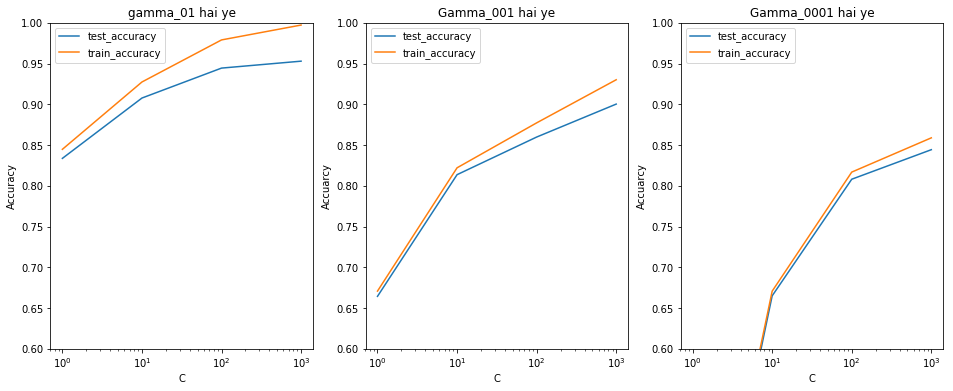

In [67]:
## ploting
plt.figure(figsize=(16,6))

plt.subplot(131)
gamma_01=cv_results[cv_results["param_gamma"]==0.01]

plt.plot(gamma_01.param_C,gamma_01.mean_test_score)
plt.plot(gamma_01.param_C,gamma_01.mean_train_score)
plt.title("gamma_01 hai ye")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.ylim(0.6,1)
plt.legend(["test_accuracy","train_accuracy"],loc="upper left")
plt.xscale("log")

plt.subplot(132)
gamma_001=cv_results[cv_results.param_gamma==0.001]

plt.plot(gamma_001.param_C,gamma_001.mean_test_score)
plt.plot(gamma_001.param_C,gamma_001.mean_train_score)
plt.title("Gamma_001 hai ye")
plt.xlabel("C")
plt.ylim(0.6,1)
plt.ylabel("Accuarcy")
plt.xscale("log")
plt.legend(["test_accuracy","train_accuracy"],loc="upper left")

plt.subplot(133)
gamma_0001=cv_results[cv_results.param_gamma==0.0001]

plt.plot(gamma_0001.param_C,gamma_0001.mean_test_score)
plt.plot(gamma_0001.param_C,gamma_0001.mean_train_score)
plt.title("Gamma_0001 hai ye")
plt.xlabel("C")
plt.ylim(0.6,1)
plt.ylabel("Accuarcy")
plt.xscale("log")
plt.legend(["test_accuracy","train_accuracy"],loc="upper left")

Some USeful insights:
- Non linear model(high gamma) perform *much better* than the linear ones.
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit, since training and test accuracies closely follow each other.

This suggest that the data and problem is **inherently non-linear** in nature, and complex model outcast the Linear Model.

In [68]:
# Choosing best hyperparameters

In [69]:
best_score=model_cv.best_score_
best_hyperparams_=model_cv.best_params_

print("The best test score {} corresponding  to hyperparameter {}".format(best_score,best_hyperparams_))

The best test score 0.953 corresponding  to hyperparameter {'C': 1000, 'gamma': 0.01}


# Building and evaluating  the final Model

In [71]:
model=SVC(kernel="rbf",C=1000,gamma=0.01)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("accuracy :{}".format(metrics.accuracy_score(y_pred,y_test)))

print(confusion_matrix(y_test,y_pred))

accuracy :0.9538333333333333
[[239   1   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 196   0   2   1   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   3   0   0   0   0]
 [  0   0 205   0   2   0   3   1   0   0   1   0   0   1   1   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   3   0 217   0   0   0   4   0   0   0   0   0   2   0   1   0   0
    0   0   1   0   0   0   0   0]
 [  0   0   0   0 217   0   4   0   0   0   0   3   0   0   0   0   1   0
    0   0   0   0   0   0   0   3]
 [  0   0   0   1   1 195   0   1   0   0   0   0   0   1   0   4   0   0
    0   0   0   1   0   0   0   0]
 [  0   0   4   3   2   0 223   1   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   4   0   9   0   0   1 176   0   2   3   0   0   0   2   0   2   2
    0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   4   1   0 221   6   0   0   0   0   0   0   0   0
    1   0   0   0   0   1